In [34]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
def mmq(f:np.array, a:np.array):
    return np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, f))

def grafico(z, user):
    plt.imshow(z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis', alpha=0.9, vmin=0, vmax=5)
    plt.colorbar(label="Avaliação do filme")
    plt.title('Regressão linear para ' + user)
    plt.xlabel('Ação')
    plt.ylabel('Romance')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.show()

filmes = ["The Notebook", "Whiplash", "Os Oito Odiados", "Os Miseráveis", "Rocky I", "Toy Story 3"]
acao = np.array([0.1, 0.8, 1.0, 0.6, 1.0, 0.9])
romance = np.array([1.0, 0.2, 0.0, 0.4, 0.2, 0.1])
generos = np.vstack((acao, romance)).T
f1 = np.linspace(0, 1, 1000)
f2 = np.linspace(0, 1, 1000)

users = {
    "Carol": np.array([4, 4, None, 2.5, 1, 3.5]),
    "Lorayne": np.array([4, 4.5, None, None, None, 5]),
    "Wilian": np.array([None, None, 4.5, None, 3.5, 3]),
    "Manu": np.array([None, None, None, 5, 4.5, 5]),
    "Thayse": np.array([3.5, 4.5, 5, None, 5, 5])
}

recomendacoes = {}
degrau = lambda x: x if 0 <= x <= 5 else (0 if x < 0 else 5) # garante que o resultado esteja entre 0 e 5
parametros = []

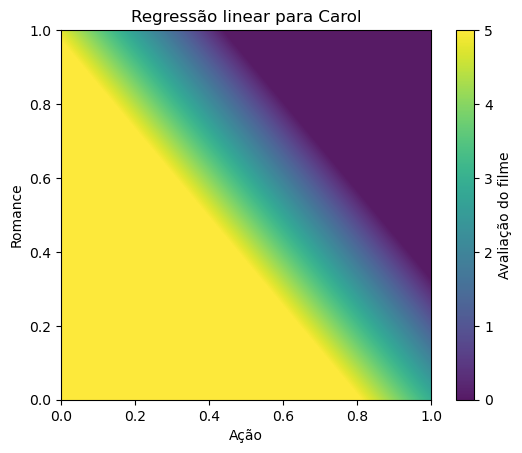

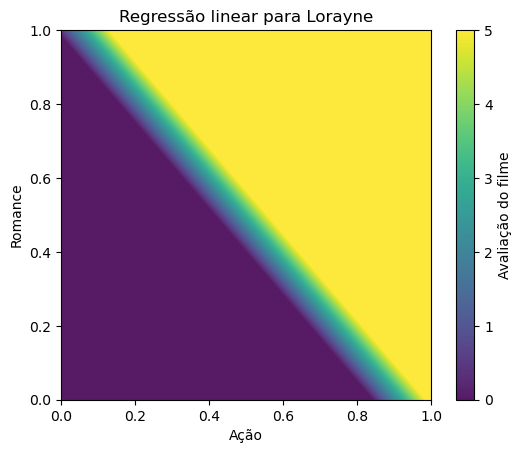

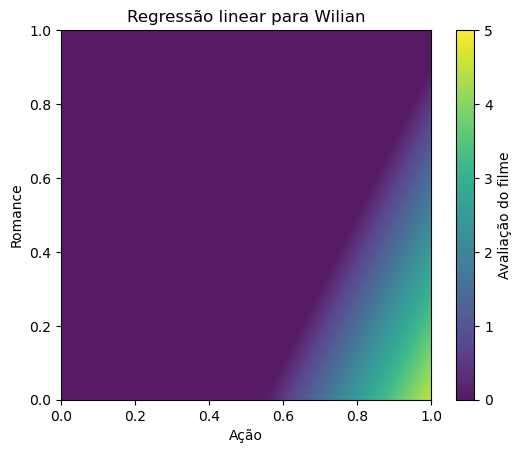

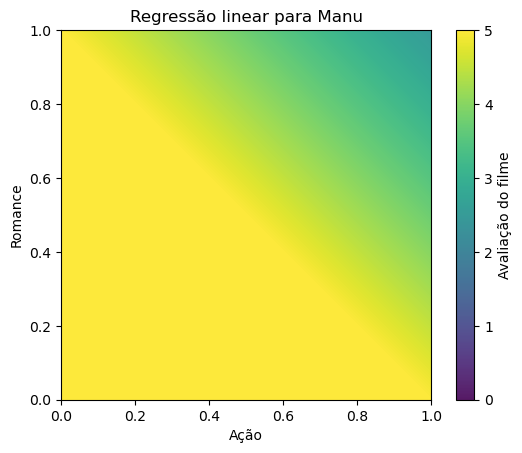

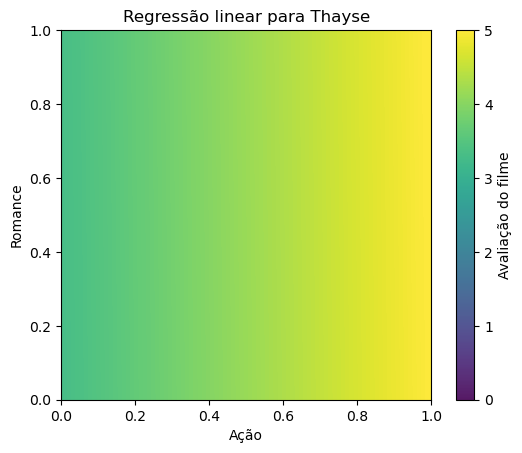

In [36]:
for user, vec in users.items():

    recomendacoes[user] = []
    f = []
    a = []

    # Remove os Nones e monta a matriz de características
    for i in range(len(vec)):
        if vec[i] != None:
            f.append(vec[i])
            a.append([1, acao[i], romance[i]])
    
    theta = mmq(np.array(f), np.array(a))
    parametros.append(theta)

    z = lambda x, y: theta[0] + theta[1]*x + theta[2]*y # função de regressão
    x, y = np.meshgrid(f1, f2)
    grafico(z(x, y), user)

    for i in range(len(vec)):
        
        # Faz a predição para os filmes não avaliados
        if vec[i] == None:
            users[user][i] = round(degrau(z(acao[i], romance[i])), 1)


        # Faz a recomendação dos filmes com nota maior ou igual a 4.5
        if users[user][i] >= 4.5:
          recomendacoes[user].append(filmes[i])

In [37]:
for user in users:
    print(f"Usuário: {user}")
    print(f"Coeficientes (θ0, θ1, θ2): {parametros.pop(0)}\n")

Usuário: Carol
Coeficientes (θ0, θ1, θ2): [ 13.78606658 -10.80764488  -9.04438964]

Usuário: Lorayne
Coeficientes (θ0, θ1, θ2): [-29.5  35.   30. ]

Usuário: Wilian
Coeficientes (θ0, θ1, θ2): [-5.5 10.  -5. ]

Usuário: Manu
Coeficientes (θ0, θ1, θ2): [ 7.5 -2.5 -2.5]

Usuário: Thayse
Coeficientes (θ0, θ1, θ2): [3.29310345 1.71301446 0.01668521]



In [38]:
for user in users:
    print(f"Notas {user}:")
    for i in range(len(filmes)):
        print(f"{filmes[i]}: {users[user][i]}")
    print()

Notas Carol:
The Notebook: 4
Whiplash: 4
Os Oito Odiados: 3.0
Os Miseráveis: 2.5
Rocky I: 1
Toy Story 3: 3.5

Notas Lorayne:
The Notebook: 4
Whiplash: 4.5
Os Oito Odiados: 5
Os Miseráveis: 3.5
Rocky I: 5
Toy Story 3: 5

Notas Wilian:
The Notebook: 0
Whiplash: 1.5
Os Oito Odiados: 4.5
Os Miseráveis: 0
Rocky I: 3.5
Toy Story 3: 3

Notas Manu:
The Notebook: 4.8
Whiplash: 5
Os Oito Odiados: 5.0
Os Miseráveis: 5
Rocky I: 4.5
Toy Story 3: 5

Notas Thayse:
The Notebook: 3.5
Whiplash: 4.5
Os Oito Odiados: 5
Os Miseráveis: 4.3
Rocky I: 5
Toy Story 3: 5



In [39]:
for user in users:
    print(f"Filmes recomendados {user}:")
    for filme in recomendacoes[user]:
        print(filme)
    print()

Filmes recomendados Carol:

Filmes recomendados Lorayne:
Whiplash
Os Oito Odiados
Rocky I
Toy Story 3

Filmes recomendados Wilian:
Os Oito Odiados

Filmes recomendados Manu:
The Notebook
Whiplash
Os Oito Odiados
Os Miseráveis
Rocky I
Toy Story 3

Filmes recomendados Thayse:
Whiplash
Os Oito Odiados
Rocky I
Toy Story 3

